In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [88]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import util

% matplotlib inline
plt.style.use("ggplot")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exploratory Data Analysis

In [3]:
#Loading data 
df = pd.read_csv("data/exercise_01_train.csv")

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [5]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


In [6]:
print("Number of columns: {} \nNumber of rows: {}".format(df.shape[1], df.shape[0]))

Number of columns: 101 
Number of rows: 40000


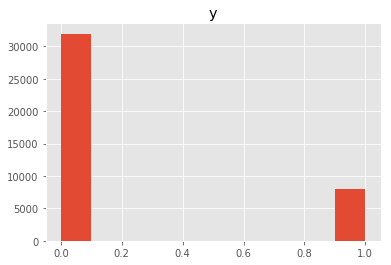

In [7]:
# Lets see the distribution of the label
df.hist(column="y")
plt.show()

In [8]:
y_dict = Counter(df["y"])
print("The minority class make up {}% of the data"
      .format(round(y_dict[1]/df.shape[0] *100)))

print("The majority class make up {}% of the data"
      .format(round(y_dict[0]/df.shape[0] *100)))

The minority class make up 20% of the data
The majority class make up 80% of the data


In [9]:
# This show the data is imbalanced and skewed towards the negative class

In [10]:
categorical_cols = util.non_numerical_col(df)

In [11]:
# Taking a look at the contents of categorical features
for col in categorical_cols:
    print(pd.unique(df[col]), "\n")

['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet'] 

['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan] 

['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49'] 

['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan] 

['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January'] 

['euorpe' 'asia' 'america' nan] 



In [12]:
# Looking into the features, these contain type of cars, days of the week, 
# dollar amount, percentage, month of the year, continent. Lets change the the dollar amount 
# and the percentage attributes to numerical values

In [13]:
util.regex(df, ["x41","x45"])

In [14]:
type(df["x45"][0])

numpy.float64

In [15]:
# Since there are few unique values in "x34", "x35", "x68" and "x93" it is a good idea to turn 
# them into dummy variables. But before doing that, observe that there are nan values. 
# Lets also see how much of the data is nan 

In [16]:
region = Counter(df["x93"])
cars = Counter(df["x34"])
days = Counter(df["x35"])
month = Counter(df["x68"])

In [17]:
print(region,"\n\n", cars,"\n\n", days,"\n\n", month)

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

 Counter({'volkswagon': 12572, 'Toyota': 10946, 'bmw': 7304, 'Honda': 5129, 'tesla': 2275, 'chrystler': 1223, 'nissan': 336, 'ford': 165, 'mercades': 32, 'chevrolet': 11, nan: 7}) 

 Counter({'wed': 14834, 'thurday': 13359, 'wednesday': 5891, 'thur': 4374, 'tuesday': 929, 'friday': 526, 'monday': 56, 'fri': 21, nan: 10}) 

 Counter({'July': 11088, 'Jun': 9279, 'Aug': 8155, 'May': 4788, 'sept.': 3466, 'Apr': 1641, 'Oct': 926, 'Mar': 409, 'Nov': 156, 'Feb': 54, 'Dev': 18, 'January': 11, nan: 9})


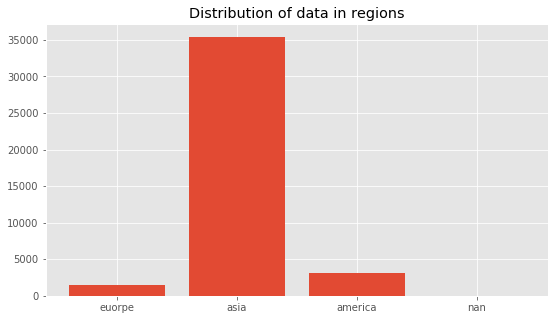

In [18]:
util.plot_cols(region, "regions")

In [19]:
print(region, "\n")
print("{}% of the data belong to asia category \n"
      .format(round(region["asia"]/sum(region.values())*100, 2)))
print("{}% of the data belong to asia category"
      .format(round(region["nan"]/sum(region.values())*100, 9)))

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

88.52% of the data belong to asia category 

0.0% of the data belong to asia category


In [20]:
# Doing the same for the other features

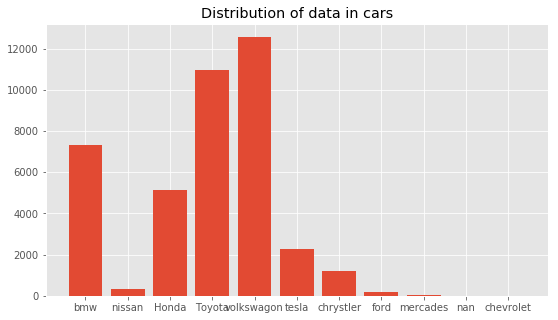

In [21]:
util.plot_cols(cars, "cars")

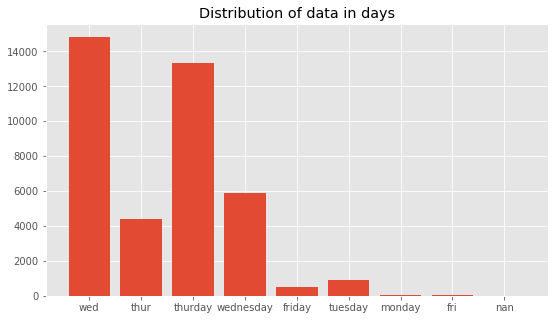

In [22]:
util.plot_cols(days, "days")

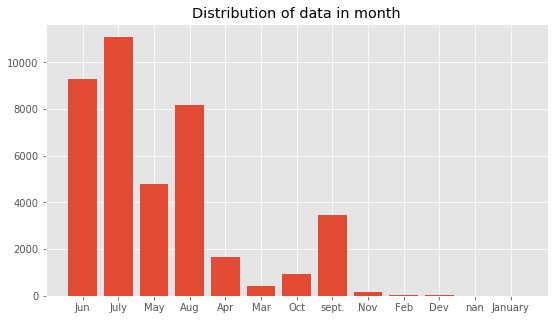

In [23]:
util.plot_cols(month, "month")

In [24]:
# Notice that in two of the plots, month and days there are duplicates in categories, 
# there are double entries of the month of january (as jun and January) and double entries 
# for wednesday/fiday as (wed and wednesday also fri and friday) as well as misspelling in thursday. 
# These categories will be merged as a single unique category. There are also mixed naming formats 
# used in days attribute (ie short and full) these will be changed for uniformity 

In [26]:
util.restructure_cols(df)

In [27]:
pd.unique(df["x35"])

array(['wed', 'thur', 'fri', 'tue', 'mon', nan], dtype=object)

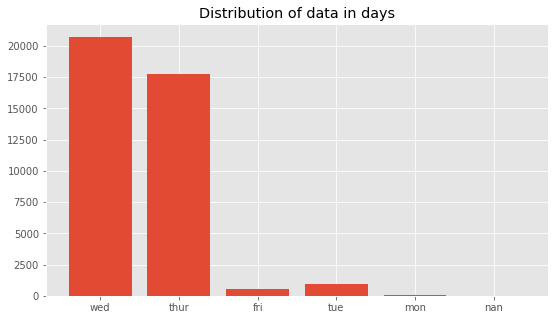

In [28]:
# After merging duplicates
util.plot_cols(Counter(df["x35"]), "days")

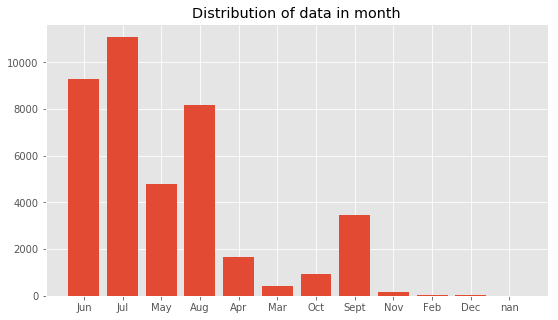

In [29]:
util.plot_cols(Counter(df["x68"]), "month")

In [30]:
# Now we can make these categorical attributs into one-in-hot encoding

In [31]:
df_dummy = pd.get_dummies(df, prefix=["x34","x35","x68","x93"])

In [32]:
df_dummy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,0,1,0,0,0,0,0,0,0,1
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,1,0,0,0,0,0,0,0,1,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1,0,0,0,0,0,0,0,1,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,0,0,0,1,0,0,0,0,1,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,1,0,0,0,0,0,0,0,1,0


In [33]:
df_dummy.shape

(40000, 126)

In [34]:
# Creating one-in-hot encoding have added 25 more features to the data
# Now the entire data is numerical, we can determine what subset from the feature will be relevant to a good model
# We can start by checking how much each feature correlates with the the label

In [35]:
null_cols = df_dummy.isnull().sum(axis=0).sort_values(ascending=False)
null_cols[null_cols>0]

x96    15
x0     14
x18    14
x55    14
x21    13
x13    13
x69    13
x7     13
x63    13
x62    13
x99    13
x42    12
x65    12
x60    12
x85    12
x94    11
x24    11
x12    11
x17    11
x28    11
x56    11
x51    11
x26    11
x77    10
x48    10
x75    10
x66    10
x89    10
x5     10
x1     10
       ..
x2      6
x49     6
x61     6
x92     6
x8      6
x38     6
x73     6
x20     6
x41     5
x29     5
x45     5
x30     5
x22     5
x64     5
x98     5
x50     5
x83     5
x81     5
x71     4
x32     4
x88     4
x47     4
x70     4
x44     4
x53     4
x14     3
x37     3
x84     3
x91     2
x43     1
Length: 96, dtype: int64

In [36]:
def fillna(df):
    for col in df.columns:
        df.fillna(df[col].mean())

In [37]:
fillna(df_dummy)
df_dummy.shape

(40000, 126)

In [36]:
df_corr = df_dummy.copy().corr()
df_na = df_dummy.copy()

In [37]:
df_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
x68_Oct,0.112879,-0.025157,-0.068854,-0.073669,-0.000956,0.014476,-0.004334,-0.000688,0.067641,0.001672,...,-0.095334,-0.084670,-0.015647,-0.056767,-0.009633,1.000000,-0.047416,0.008289,-0.001939,-0.008474
x68_Sept,0.150365,-0.036598,-0.094202,-0.098149,-0.007896,0.006901,0.000032,0.002633,0.089547,-0.001965,...,-0.190745,-0.169408,-0.031306,-0.113579,-0.019273,-0.047416,1.000000,0.005047,-0.002005,-0.003554
x93_america,-0.002837,0.004870,-0.005386,-0.000074,-0.008254,0.002762,0.006983,0.005911,-0.006394,0.008608,...,-0.009620,-0.001175,-0.000985,0.000178,-0.000344,0.008289,0.005047,1.000000,-0.810009,-0.056526
x93_asia,0.002733,-0.005581,0.003540,-0.001718,0.006708,-0.000033,-0.001783,-0.005009,0.005605,-0.008206,...,0.011324,-0.001809,0.002294,-0.000594,0.001139,-0.001939,-0.002005,-0.810009,1.000000,-0.538225
x93_euorpe,0.000018,0.002518,0.001768,0.003200,0.000079,-0.003590,-0.007008,0.000188,-0.000856,0.001120,...,-0.005497,0.004977,-0.002402,0.000690,-0.001390,-0.008474,-0.003554,-0.056526,-0.538225,1.000000


In [38]:
# There are multiple features in the data and we will not create 
# individual vizualization to see the correlation. To understand the 
# correlation, we will select correlation value of each feature with the label 

In [39]:
df_y = df_corr.loc[["y"],:]

In [40]:
# Sorting by positive correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=False).index]

,y,x58,x97,x1,x99,x79,x63,x72,x69,x78,...,x96,x21,x50,x66,x3,x22,x70,x41,x37,x75
y,1.0,0.18666,0.184344,0.101217,0.098397,0.09582,0.095792,0.095313,0.095173,0.094825,...,-0.091515,-0.092892,-0.093171,-0.096199,-0.096704,-0.097655,-0.104042,-0.181519,-0.195297,-0.2105


In [41]:
# Sorting by negative correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=True).index]

,x75,x37,x41,x70,x22,x3,x66,x50,x21,x96,...,x78,x69,x72,x63,x79,x99,x1,x97,x58,y
y,-0.2105,-0.195297,-0.181519,-0.104042,-0.097655,-0.096704,-0.096199,-0.093171,-0.092892,-0.091515,...,0.094825,0.095173,0.095313,0.095792,0.09582,0.098397,0.101217,0.184344,0.18666,1.0


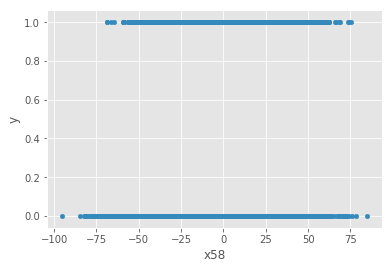

In [147]:
df_dummy.plot(kind="scatter", x="x58", y="y")

In [42]:
# Generally there is a week correlation both positively and negatively. 
# The feature with the most correction correlation x75 has a correlation value 
# of -0.2105 which is a weak correlation value. But 

#### Lets try resampling the data to balance the dataset

The data is not a large dataset, undersampling the data will lead to loss of information. The better approach will be oversampling the minority class to the same amount of the majority class. A good technique for this is using SMOTE algorithm to generate synthetic data.

Since we do not know much about the features in the data besides the categorical features there is no clear cut way of making any assumptions about the NaN. Dropping NaN in the data should have much impact on the model since observations with NaN only make up 2% of the data.

In [43]:
df_dummy.dropna(inplace=True)

In [44]:
data = df_dummy.copy()
y = data.pop("y")
X = data.values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=1)

In [46]:
print("Original dataset shape {}".format(dict(Counter(y_train))))

Original dataset shape {1: 5915, 0: 23509}


In [47]:
sm = SMOTE(random_state=1)

In [48]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [49]:
print("Resampled dataset shape {}".format(dict(Counter(y_train_res))))

Resampled dataset shape {1: 23509, 0: 23509}


#### RandomForest Classifier

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
y_pred = rfc.predict(X_test)

In [52]:
precision, recall, accuracy, matrix = util.metric(y_test, y_pred)

In [53]:
# Confusion matrix
matrix

array([[ 899,  190],
       [1071, 7648]])

In [54]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))

Recall: 0.46
Precision: 0.83


In [55]:
# We used all features in the dataset but not all the features are 
# relevant to build a good model, some unimportant features only 
# contribute noise to the data, therefore we will use only the 
# important features that contributed to the improved outcome of the 
# model to build a new model

In [56]:
important_cols_rf = df_dummy.columns[np.argsort(rfc.feature_importances_)[::-1]][:50]
important_cols_rf

Index(['x35_tue', 'x37', 'x75', 'x58', 'x35_mon', 'x34_tesla', 'x97',
       'x68_Feb', 'x99', 'x41', 'x51', 'x34_Honda', 'x83', 'x44', 'x68_Apr',
       'x96', 'x34_Toyota', 'x22', 'x1', 'x5', 'x21', 'x2', 'x70', 'x66',
       'x72', 'x53', 'x10', 'x50', 'x63', 'x45', 'x73', 'x40', 'x12', 'x43',
       'x4', 'x19', 'x85', 'x33', 'x78', 'x57', 'x56', 'x3', 'x74', 'x27',
       'x90', 'x71', 'x25', 'x8', 'x68_Jul', 'x95'],
      dtype='object')

In [57]:
X_imp = df_dummy[important_cols_rf].values
y_imp = df_dummy["y"]

In [58]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_imp, y_imp, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [59]:
print("Original dataset shape {}".format(dict(Counter(y_train_rf))))

Original dataset shape {1: 5915, 0: 23509}


In [60]:
X_res_imp, y_res_imp = sm.fit_resample(X_train_rf, y_train_rf)

In [61]:
print("Resampled dataset shape {}".format(dict(Counter(y_res_imp))))

Resampled dataset shape {1: 23509, 0: 23509}


In [62]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_res_imp, y_res_imp)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
y_pred_rf = rfc2.predict(X_test_rf)

In [64]:
precision_rf, recall_rf, accuracy_rf, matrix_rf = util.metric(y_test_rf, y_pred_rf)

In [65]:
# Confusion matrix
matrix_rf

array([[1243,  259],
       [ 727, 7579]])

In [66]:
print("Recall: {}".format(round(recall_rf,2)))
print("Precision: {}".format(round(precision_rf,2)))

Recall: 0.63
Precision: 0.83


In [67]:
#predicted probabilities
scores_rf = rfc2.predict_proba(X_test_rf)

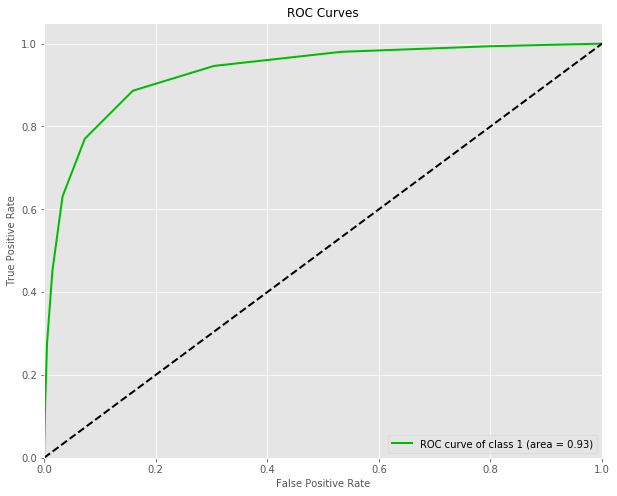

In [68]:
_=skplt.metrics.plot_roc(y_test_rf, scores_rf, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

### GridSearch

In [69]:
param_grid = {"criterion":["gini"],
             "n_estimators":[100],
             "max_depth": [20],
            "max_features": [5]}

# run grid search
grid_search = GridSearchCV(rfc2, param_grid=param_grid, n_jobs=-1)

grid_search.fit(X_res_imp, y_res_imp)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini'], 'n_estimators': [100], 'max_depth': [20], 'max_features': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
rfc_best = grid_search.best_estimator_
rfc_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
y_pred_best = rfc_best.predict(X_test_rf)

In [72]:
precision_best, recall_best, accuracy_best, matrix_best = util.metric(y_test_rf, y_pred_best)

In [73]:
# Confusion matrix
matrix_best

array([[1524,  181],
       [ 446, 7657]])

In [74]:
print("Recall: {}".format(round(recall_best,2)))
print("Precision: {}".format(round(precision_best,2)))

Recall: 0.77
Precision: 0.89


#### GradientBoosting Classifier

In [75]:
gb = GradientBoostingClassifier()
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
y_pred_gb = gb.predict(X_test)

In [77]:
precision_gb, recall_gb, accuracy_gb, matrix_gb = util.metric(y_test, y_pred_gb)

In [78]:
# Confusion matrix
matrix_gb

array([[1310,  277],
       [ 660, 7561]])

In [79]:
print("Recall: {}".format(round(recall_gb,2)))
print("Precision: {}".format(round(precision_gb,2)))

Recall: 0.66
Precision: 0.83


In [80]:
# Applying the concept of important features again by taking 50 features

In [81]:
df_imp = df_dummy.drop(columns="y")
important_cols_gb = df_imp.columns[np.argsort(gb.feature_importances_)[::-1]][:50]
important_cols_gb

Index(['x35_thur', 'x37', 'x75', 'x68_Jul', 'x45', 'x58', 'x68_Jun', 'x97',
       'x34_volkswagon', 'x35_wed', 'x41', 'x99', 'x51', 'x34_Toyota', 'x83',
       'x66', 'x10', 'x53', 'x68_Aug', 'x70', 'x5', 'x34_bmw', 'x21', 'x40',
       'x44', 'x63', 'x12', 'x96', 'x1', 'x50', 'x57', 'x3', 'x22', 'x74',
       'x2', 'x4', 'x56', 'x72', 'x78', 'x19', 'x73', 'x34_Honda', 'x33',
       'x85', 'x0', 'x8', 'x43', 'x25', 'x79', 'x47'],
      dtype='object')

In [82]:
X_imp_gb = df_dummy[important_cols_gb].values
y_imp_gb = df_dummy["y"]

In [83]:
X_train_gb2, X_test_gb2, y_train_gb2, y_test_gb2 = train_test_split(X_imp_gb, 
                                                                    y_imp_gb, 
                                                                    test_size=0.25, 
                                                                    random_state=1)

In [84]:
print("Original dataset shape {}".format(dict(Counter(y_train_gb2))))

Original dataset shape {1: 5915, 0: 23509}


In [85]:
X_res_imp_gb, y_res_imp_gb = sm.fit_resample(X_train_gb2, y_train_gb2)

In [86]:
print("Resampled dataset shape {}".format(dict(Counter(y_res_imp_gb))))

Resampled dataset shape {1: 23509, 0: 23509}


In [87]:
gb2 = GradientBoostingClassifier()
gb2.fit(X_res_imp_gb, y_res_imp_gb)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [88]:
y_pred_gb2 = gb2.predict(X_test_gb2)

In [89]:
precision_gb2, recall_gb2, accuracy_gb2, matrix_gb2 = util.metric(y_test_gb2, y_pred_gb2)

In [90]:
# Confusion matrix
matrix_gb2

array([[1313,  282],
       [ 657, 7556]])

In [91]:
print("Recall: {}".format(round(recall_gb2,2)))
print("Precision: {}".format(round(precision_gb2,2)))

Recall: 0.67
Precision: 0.82


In [92]:
#predicted probabilities
scores_gb2 = gb2.predict_proba(X_test_gb2)

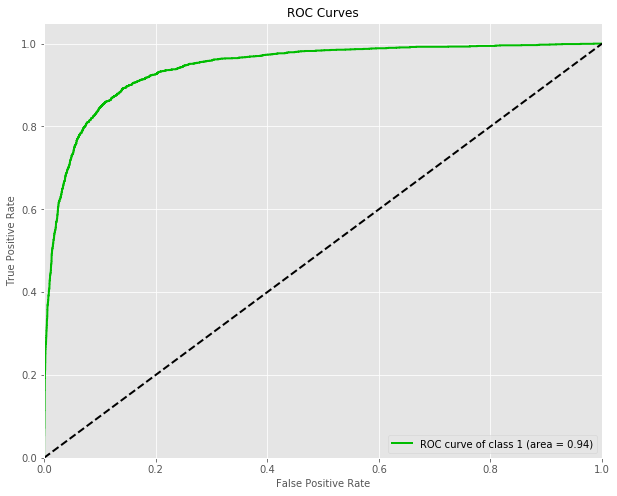

In [93]:
_=skplt.metrics.plot_roc(y_test_gb2, scores_gb2, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

In [94]:
param_grid2 = {"learning_rate": [0.6,0.8],
               "n_estimators":[200, 300, 400, 500, 600],
                "max_depth":[2,3,5],
                "max_features":["log2", "sqrt",],
                "criterion": ["friedman_mse"]}

# run grid search
grid_search2 = GridSearchCV(gb, param_grid=param_grid2, n_jobs=-1)

grid_search2.fit(X_res_imp_gb, y_res_imp_gb)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.6, 0.8], 'n_estimators': [200, 300, 400, 500, 600], 'max_depth': [2, 3, 5], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
gb3 = grid_search2.best_estimator_
gb3

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [96]:
y_pred_gb3 = gb3.predict(X_test_gb2)

In [97]:
precision_gb3, recall_gb3, accuracy_gb3, matrix_gb3 = util.metric(y_test_gb2, y_pred_gb2)

In [98]:
# Confusion matrix
matrix_gb3

array([[1313,  282],
       [ 657, 7556]])

In [99]:
print("Recall: {}".format(round(recall_gb3,2)))
print("Precision: {}".format(round(precision_gb3,2)))

Recall: 0.67
Precision: 0.82


In [ ]:
df_na.isnull().sum(axis=0).sort_values(ascending=False)

### Support Vector Classifier

In [41]:
pipeline = Pipeline([('scaler', StandardScaler()),
                        ('svc', SVC(kernel='rbf'))])


In [50]:
pipeline.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [51]:
y_pred_svc = pipeline.predict(X_test)

In [52]:
precision_svc, recall_svc, accuracy_svc, matrix_svc = util.metric(y_test, y_pred_svc)

In [53]:
# Confusion matrix
matrix_svc

array([[1865,   34],
       [ 105, 7804]])

In [54]:
print("Recall: {}".format(round(recall_svc,2)))
print("Precision: {}".format(round(precision_svc,2)))

Recall: 0.95
Precision: 0.98


In [56]:
np.unique(y_pred_svc)

array([0, 1])

In [57]:
pipeline.score(X_test, y_test)

0.9858278955954323

In [80]:
pipeline1 = Pipeline([('scaler', StandardScaler()),
                        ('svc', SVC(kernel='poly'))])


In [81]:
pipeline1.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [82]:
y_pred_svc1 = pipeline1.predict(X_test)

In [83]:
precision_svc1, recall_svc1, accuracy_svc1, matrix_svc1 = util.metric(y_test, y_pred_svc1)

In [84]:
# Confusion matrix
matrix_svc1

array([[1748,  315],
       [ 222, 7523]])

In [85]:
print("Recall: {}".format(round(recall_svc1,2)))
print("Precision: {}".format(round(precision_svc1,2)))

Recall: 0.89
Precision: 0.85


In [86]:
np.unique(y_pred_svc1)

array([0, 1])

In [87]:
pipeline1.score(X_test, y_test)

0.9452487765089723

### GridSearch

In [ ]:
rbf = SVC(kernel="rbf")

grid_params = {"C":[0.001, 0.01, 0.1, 1.0, 10.0], "gamma": np.logspace(-10, 3, 10)}
g = GridSearchCV(estimator=rbf, scoring='accuracy', param_grid=grid_params, cv=10)
g.fit(X_train_res, y_train_res)

In [ ]:
new_rbf = g.best_estimator_
new_rbf.score(X_test, y_test)

In [ ]:
y_pred_svc2 = new_rbf.predict(X_test)

In [ ]:
precision_svc2, recall_svc2, accuracy_svc2, matrix_svc2 = util.metric(y_test, y_pred_svc2)

In [ ]:
# Confusion matrix
matrix_svc2

In [ ]:
print("Recall: {}".format(round(recall_svc2,2)))
print("Precision: {}".format(round(precision_svc2,2)))

### Naive Bayes

In [97]:

nb = Pipeline([('scaler', StandardScaler()),
                        ('nb', GaussianNB())])

nb.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nb', GaussianNB(priors=None, var_smoothing=1e-09))])

In [98]:
y_pred_nb = nb.predict(X_test)

In [99]:
precision_nb, recall_nb, accuracy_nb, matrix_nb = util.metric(y_test, y_pred_nb)

In [100]:
# Confusion matrix
matrix_nb

array([[1145, 1519],
       [ 825, 6319]])

In [101]:
print("Recall: {}".format(round(recall_nb,2)))
print("Precision: {}".format(round(precision_nb,2)))

Recall: 0.58
Precision: 0.43
